In [1]:
from ucimlrepo import fetch_ucirepo 
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import learning_curve
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import time

In [2]:
RANDOM_STATE = 101

### Load Data

In [3]:
# Wine Quality Data
# fetch dataset 
wq_df = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wq_df.data.features 
y = wq_df.data.targets 

#### Balancing dataset

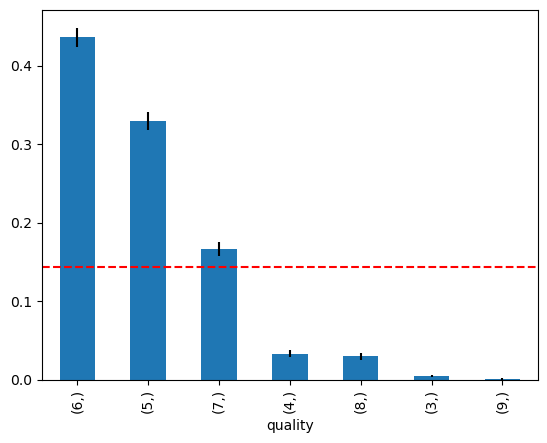

In [4]:
freqs =y.value_counts() /len(y)
std_errors = np.sqrt(freqs*(1-freqs)/len(y))
expected_frequency = 1/len(np.unique(y))

freqs.plot(kind='bar',yerr=std_errors*1.96)

plt.axhline(expected_frequency,color='red',linestyle='--')

### Model

#### Default

In [5]:
# Split into training and testing sets. Don't use test set until the very end
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_STATE, stratify = y)

In [6]:
svc = SVC(random_state=RANDOM_STATE)
os = RandomOverSampler(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('os', os), ('model', svc)])
pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)

In [7]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           3       0.03      0.17      0.06         6
           4       0.18      0.70      0.28        43
           5       0.58      0.54      0.56       428
           6       0.57      0.28      0.38       567
           7       0.36      0.44      0.40       216
           8       0.16      0.62      0.25        39
           9       0.00      0.00      0.00         1

    accuracy                           0.42      1300
   macro avg       0.27      0.39      0.27      1300
weighted avg       0.51      0.42      0.43      1300



In [8]:
rbf_train_sizes, rbf_train_scores, rbf_validation_scores = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train.values.ravel(), cv = 4,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

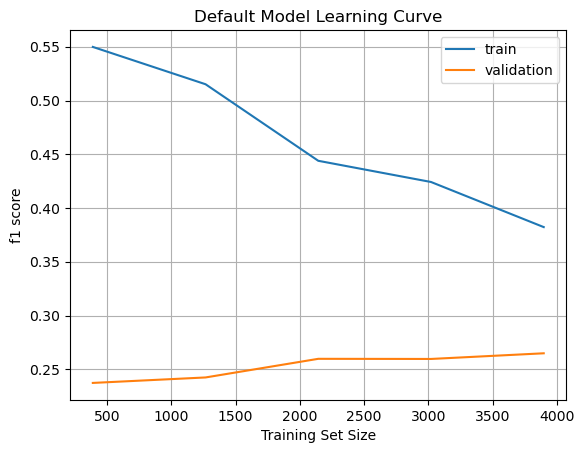

In [9]:
rbf_train_mean = rbf_train_scores.mean(axis=1)
rbf_validation_mean = rbf_validation_scores.mean(axis=1)

plt.plot(rbf_train_sizes, rbf_train_mean, label="train")
plt.plot(rbf_train_sizes, rbf_validation_mean, label="validation")

plt.title("Default Model Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc="best")
plt.grid()
plt.savefig('wine_plots/svm_wq_default_learning_curve.png')
plt.show()

#### Intermediate Model

##### Kernel

In [10]:
svc = SVC(kernel='poly', random_state=RANDOM_STATE)
os = RandomOverSampler(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('os', os), ('model', svc)])
pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)

In [11]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           3       0.03      0.17      0.05         6
           4       0.16      0.70      0.26        43
           5       0.57      0.57      0.57       428
           6       0.59      0.28      0.38       567
           7       0.41      0.44      0.43       216
           8       0.14      0.54      0.22        39
           9       0.00      0.00      0.00         1

    accuracy                           0.42      1300
   macro avg       0.27      0.39      0.27      1300
weighted avg       0.52      0.42      0.44      1300



/Users/VivianNTran/anaconda3/envs/ML_A1_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/VivianNTran/anaconda3/envs/ML_A1_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/VivianNTran/anaconda3/envs/ML_A1_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [12]:
poly_train_sizes, poly_train_scores, poly_validation_scores = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train.values.ravel(), cv = 4,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

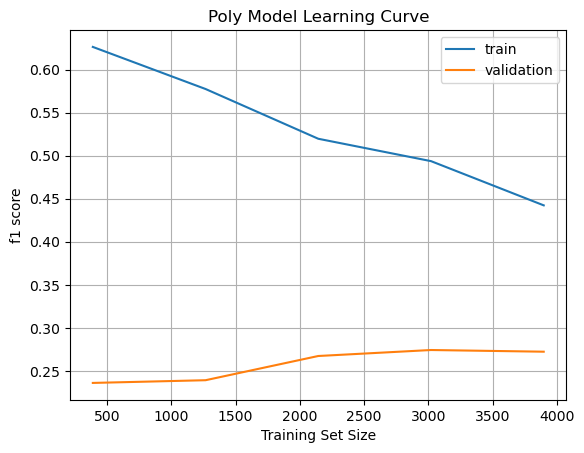

In [13]:
poly_train_mean = poly_train_scores.mean(axis=1)
poly_validation_mean = poly_validation_scores.mean(axis=1)

plt.plot(poly_train_sizes, poly_train_mean, label="train")
plt.plot(poly_train_sizes, poly_validation_mean, label="validation")

plt.title("Poly Model Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc="best")
plt.grid()
plt.savefig('wine_plots/svm_wq_poly_learning_curve.png')
plt.show()

In [14]:
svc = SVC(kernel='linear', random_state=RANDOM_STATE)
os = RandomOverSampler(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('os', os), ('model', svc)])
pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)

In [15]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           3       0.01      0.33      0.02         6
           4       0.12      0.42      0.19        43
           5       0.49      0.39      0.44       428
           6       0.51      0.15      0.24       567
           7       0.34      0.36      0.35       216
           8       0.11      0.54      0.19        39
           9       0.00      0.00      0.00         1

    accuracy                           0.29      1300
   macro avg       0.23      0.31      0.20      1300
weighted avg       0.45      0.29      0.32      1300



In [16]:
linear_train_sizes, linear_train_scores, linear_validation_scores = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train.values.ravel(), cv = 4,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

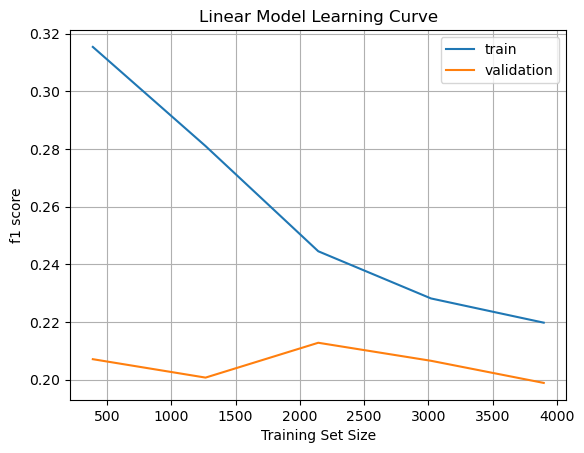

In [17]:
linear_train_mean = linear_train_scores.mean(axis=1)
linear_validation_mean = linear_validation_scores.mean(axis=1)

plt.plot(linear_train_sizes, linear_train_mean, label="train")
plt.plot(linear_train_sizes, linear_validation_mean, label="validation")

plt.title("Linear Model Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc="best")
plt.grid()
plt.savefig('wine_plots/svm_wq_linear_learning_curve.png')
plt.show()

In [18]:
svc = SVC(kernel='sigmoid', random_state=RANDOM_STATE)
os = RandomOverSampler(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('os', os), ('model', svc)])
pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)

In [19]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        43
           5       0.29      0.24      0.26       428
           6       0.00      0.00      0.00       567
           7       0.00      0.00      0.00       216
           8       0.00      0.00      0.00        39
           9       0.00      0.00      0.00         1

    accuracy                           0.08      1300
   macro avg       0.04      0.03      0.04      1300
weighted avg       0.10      0.08      0.09      1300



/Users/VivianNTran/anaconda3/envs/ML_A1_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/VivianNTran/anaconda3/envs/ML_A1_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/VivianNTran/anaconda3/envs/ML_A1_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [20]:
sigmoid_train_sizes, sigmoid_train_scores, sigmoid_validation_scores = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train.values.ravel(), cv = 4,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

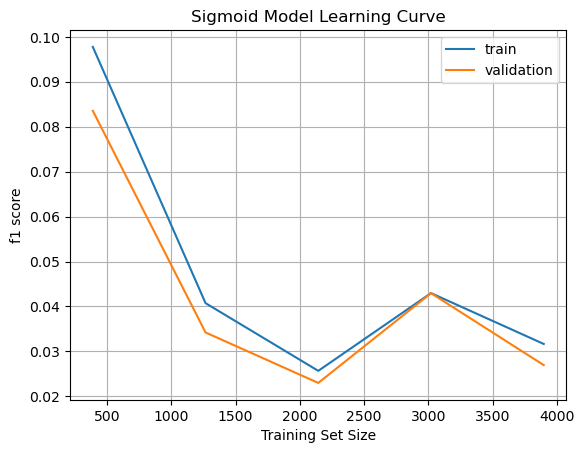

In [21]:
sigmoid_train_mean = sigmoid_train_scores.mean(axis=1)
sigmoid_validation_mean = sigmoid_validation_scores.mean(axis=1)


plt.plot(sigmoid_train_sizes, sigmoid_train_mean, label="train")
plt.plot(sigmoid_train_sizes, sigmoid_validation_mean, label="validation")

plt.title("Sigmoid Model Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc="best")
plt.grid()
plt.savefig('wine_plots/svm_wq_sigmoid_learning_curve.png')
plt.show()

### Kernel Learning Curve

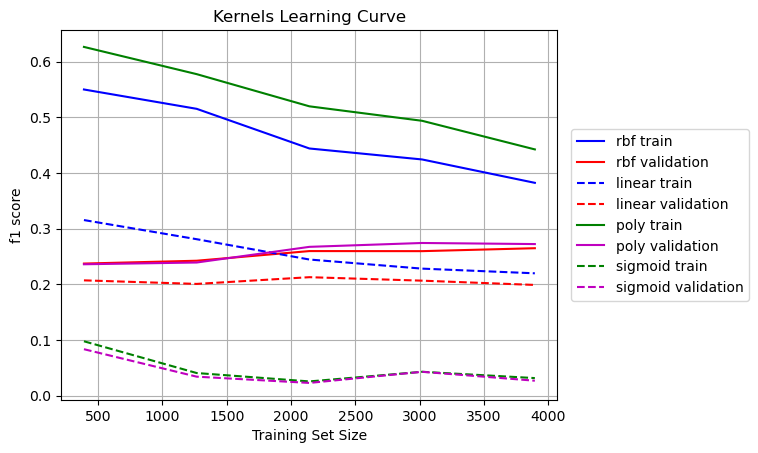

In [22]:
plt.plot(rbf_train_sizes, rbf_train_mean, 'b', label="rbf train")
plt.plot(rbf_train_sizes, rbf_validation_mean, 'r', label="rbf validation")
plt.plot(linear_train_sizes, linear_train_mean, 'b--',label="linear train")
plt.plot(linear_train_sizes, linear_validation_mean, 'r--', label="linear validation")
plt.plot(poly_train_sizes, poly_train_mean, 'g', label="poly train")
plt.plot(poly_train_sizes, poly_validation_mean, 'm', label="poly validation")
plt.plot(sigmoid_train_sizes, sigmoid_train_mean, 'g--', label="sigmoid train")
plt.plot(sigmoid_train_sizes, sigmoid_validation_mean, 'm--', label="sigmoid validation")

plt.title("Kernels Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
plt.grid()
plt.savefig('wine_plots/svm_wq_kernels_learning_curve.png', bbox_inches='tight')
plt.show()

#### Final Model

In [23]:
svc = SVC(random_state=RANDOM_STATE, C = 1000)
os = RandomOverSampler(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('os', os), ('model', svc)])
t0 = time.time()
pipeline.fit(X_train, y_train.values.ravel())
print("Training time:", time.time()-t0)
y_pred = pipeline.predict(X_test)

Training time: 19.657609939575195


In [24]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.23      0.37      0.28        43
           5       0.62      0.65      0.63       428
           6       0.65      0.50      0.57       567
           7       0.50      0.62      0.56       216
           8       0.27      0.44      0.33        39
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1300
   macro avg       0.32      0.37      0.34      1300
weighted avg       0.58      0.56      0.57      1300



/Users/VivianNTran/anaconda3/envs/ML_A1_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/VivianNTran/anaconda3/envs/ML_A1_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/VivianNTran/anaconda3/envs/ML_A1_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [25]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train.values.ravel(), cv = 4,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

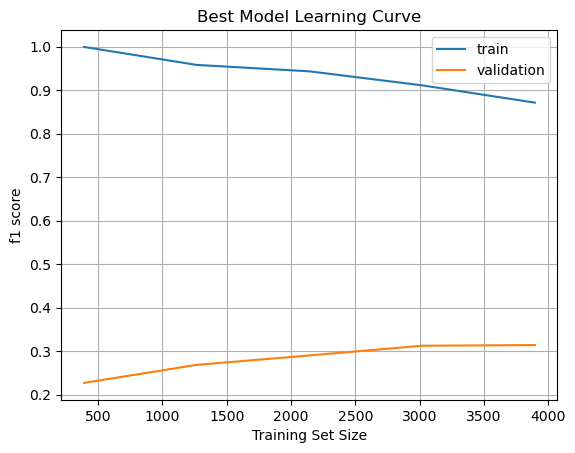

In [26]:
train_mean = train_scores.mean(axis=1)
validation_mean = validation_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, validation_mean, label="validation")

plt.title("Best Model Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc="best")
plt.grid()
plt.savefig('wine_plots/svm_wq_best_learning_curve.png')
plt.show()

#### Sub/Optimal Learning Curve

In [27]:
# Suboptimal Model
svc = SVC(random_state=RANDOM_STATE)
os = RandomOverSampler(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('os', os), ('model', svc)])
pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)

In [28]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           3       0.03      0.17      0.06         6
           4       0.18      0.70      0.28        43
           5       0.58      0.54      0.56       428
           6       0.57      0.28      0.38       567
           7       0.36      0.44      0.40       216
           8       0.16      0.62      0.25        39
           9       0.00      0.00      0.00         1

    accuracy                           0.42      1300
   macro avg       0.27      0.39      0.27      1300
weighted avg       0.51      0.42      0.43      1300



In [29]:
svc = SVC(random_state=RANDOM_STATE)
os = RandomOverSampler(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('os', os), ('model', svc)])

train_sizes, train_scores, validation_scores = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train.values.ravel(), cv = 4,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

svc = SVC(random_state=RANDOM_STATE, C=1000)
os = RandomOverSampler(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('os', os), ('model', svc)])

train_sizes1, train_scores1, validation_scores1 = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train.values.ravel(), cv = 4,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

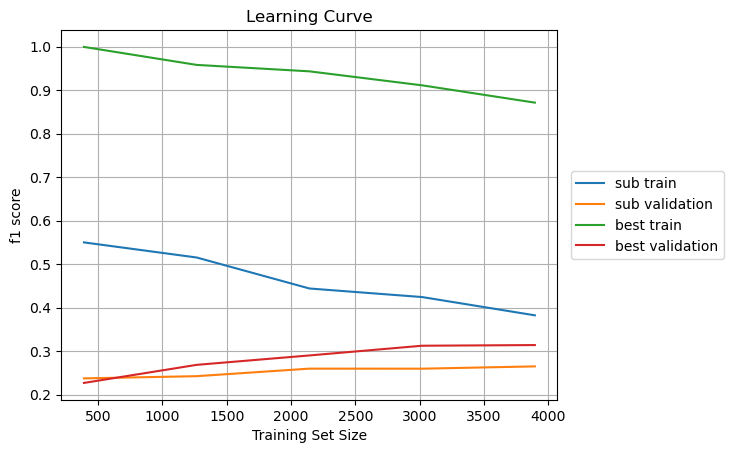

In [30]:
train_mean = train_scores.mean(axis=1)
validation_mean = validation_scores.mean(axis=1)
train_mean1 = train_scores1.mean(axis=1)
validation_mean1 = validation_scores1.mean(axis=1)

plt.plot(train_sizes, train_mean, label="sub train")
plt.plot(train_sizes, validation_mean, label="sub validation")
plt.plot(train_sizes1, train_mean1, label="best train")
plt.plot(train_sizes1, validation_mean1, label="best validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
# plt.tight_layout()
plt.grid()
plt.savefig('wine_plots/svm_wq_combo_learning_curve.png', bbox_inches='tight')
plt.show()

### Validation Plot

In [31]:
from sklearn.model_selection import validation_curve
import numpy as np

In [32]:
svc = SVC(random_state=RANDOM_STATE)
os = RandomOverSampler(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('os', os), ('model', svc)])

#### C

In [33]:
parameter_range = [0.1, 1, 10, 15, 20, 50, 100, 1000]
train_score, test_score = validation_curve(pipeline, X_train, y_train.values.ravel(),
                                          param_name="model__C",
                                           param_range=parameter_range,
                                           cv=4, scoring="f1_macro")

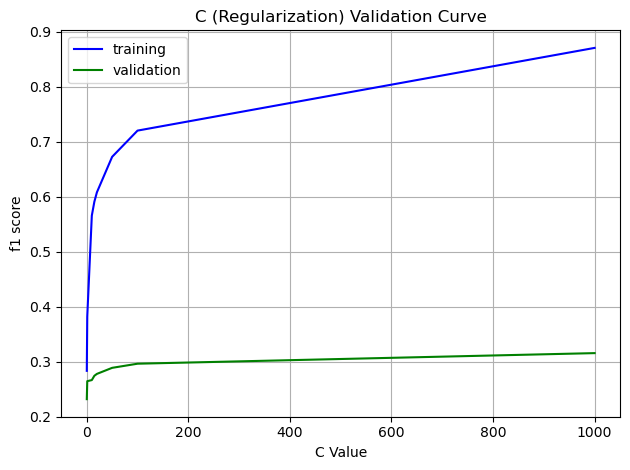

In [34]:
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis=1)
std_test_score = np.std(test_score, axis=1)


# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
         label="training", color='b')
plt.plot(parameter_range, mean_test_score,
         label="validation", color='g')
 
# Creating the plot
plt.title("C (Regularization) Validation Curve")
plt.xlabel("C Value")
plt.ylabel("f1 score")
plt.tight_layout()
plt.legend(loc='best')
plt.grid()
plt.savefig('wine_plots/svm_wq_c_validation_curve.png')
plt.show()

### Grid Search

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
svc = SVC(random_state=RANDOM_STATE)
os = RandomOverSampler(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('os', os), ('model', svc)])

In [37]:
svc = SVC(random_state=RANDOM_STATE)
os = RandomOverSampler(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('os', os), ('model', svc)])
params = [{'model__C': [0.1, 1, 10, 100, 1000],  
              'model__kernel': ['rbf', 'poly', 'linear', 'sigmoid']}]
grid = GridSearchCV(pipeline,
                      param_grid=params,
                      scoring='f1_macro',
                      cv=4)
grid.fit(X_train, y_train.values.ravel())
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

{'model__C': 1000, 'model__kernel': 'rbf'}
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.23      0.37      0.28        43
           5       0.62      0.65      0.63       428
           6       0.65      0.50      0.57       567
           7       0.50      0.62      0.56       216
           8       0.27      0.44      0.33        39
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1300
   macro avg       0.32      0.37      0.34      1300
weighted avg       0.58      0.56      0.57      1300



/Users/VivianNTran/anaconda3/envs/ML_A1_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/VivianNTran/anaconda3/envs/ML_A1_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/VivianNTran/anaconda3/envs/ML_A1_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,